In [11]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [13]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data(path="mnist.npz")

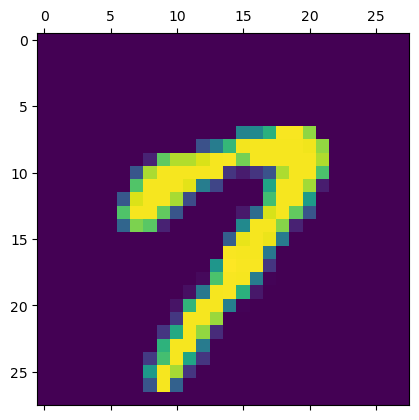

In [14]:
plt.matshow(x_train[15])

In [21]:
y_train[15]

7

In [15]:
x_train = x_train/255
x_test=x_test/255

In [17]:
len(x_train)

60000

In [19]:
x_train[0].shape

(28, 28)

In [20]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
# x_train_flat = x_train.reshape(len(x_train), 784)

In [ ]:
# x_test_flat = x_test.reshape(len(x_test), 28*28)

In [ ]:
# print(x_train_flat.shape)
# print(x_test_flat.shape)

In [ ]:
# model = keras.Sequential([
#     keras.layers.Dense(100, input_shape=(784,), activation='relu'),
#     keras.layers.Dense(10, activation='sigmoid')
# ])
# model.compile(optimizer='adam',
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy']
# )
# model.fit(x_train_flat, y_train, epochs=5)

In [22]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
)
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2788 - accuracy: 0.9208
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1272 - accuracy: 0.9637
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0911 - accuracy: 0.9726
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0685 - accuracy: 0.9791
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0541 - accuracy: 0.9829


In [23]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 100)               78500     
                                                                 
 dense_7 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 0s 797us/step - loss: 0.0895 - accuracy: 0.9724


[0.08945867419242859, 0.9724000096321106]

In [25]:
y_pred=model.predict(x_test)

313/313 [==============================] - 0s 720us/step


In [26]:
y_pred_label=[np.argmax(array) for array in y_pred]

Text(95.72222222222221, 0.5, 'Truth')

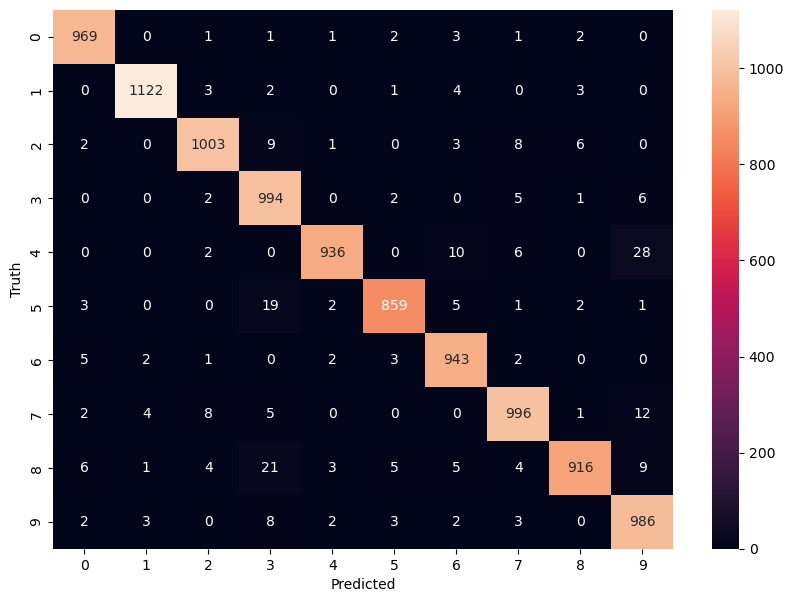

In [30]:
import seaborn as sns
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_label)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')